# Author: Hemant
# The Sparks Foundation
# Object Detection
# Objective: Implementing an object detector which identifies the classes of the objects in an image or a video 

# Import the Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_file = 'frozen_inference_graph.pb'

model = cv2.dnn_DetectionModel(frozen_file , config_file)

# Importing the object labels and setting important parameters

In [3]:
features  = []
label_file = 'labels.txt'
with open(label_file,'rt') as f:
    features = f.read().rstrip('\n').split('\n')

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
font_scale = 3
font_type = cv2.FONT_HERSHEY_PLAIN

# Implementing the detector for an image

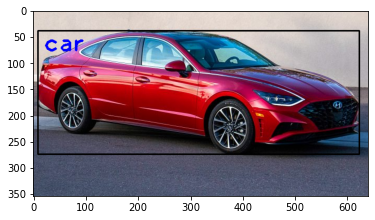

In [4]:
img = cv2.imread('car.jpg')

Classindex,Confidence,bbox = model.detect(img , confThreshold = 0.5)

for Classind,Conf,box in zip(Classindex.flatten() , Confidence.flatten() , bbox):
    cv2.rectangle(img , box , (0 ,0,0) , 2)
    cv2.putText(img ,features[Classind-1] , (box[0] + 10 , box[1] +40) , font_type , fontScale = font_scale , color  = (255,0,0) , thickness =3)

    
img2 = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img2)

# Implementing the detector for a video

In [5]:
vid = cv2.VideoCapture('160820_230_NYC_TimeSquare2_1080p.mp4')
if not vid.isOpened():
    vid = cv2.VideoCapture('160820_230_NYC_TimeSquare2_1080p.mp4')
    if not vid.isOpened():
        print('Error in video file')

while True:
    ret , frame = vid.read()
    frame = cv2.resize(frame,(1080,640),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
    Classindex,Confidence,bbox = model.detect(frame , confThreshold = 0.55)
    
    #print(Classindex)
    
    if (len(Classindex) != 0):
        for Classind,Conf,box in zip(Classindex.flatten() , Confidence.flatten() , bbox):
            if (Classind <= 80):
                cv2.rectangle(frame , box , (0 ,0,255) , 2)
                cv2.putText(frame,features[Classind-1] , (box[0] + 10 , box[1] +40) , font_type , fontScale = font_scale , color  = (255,0,0) , thickness =3)
    
    cv2.imshow('OUTPUT' , frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
    
vid.release()
cv2.destroyAllWindows()